# Pymaceuticals Objectives
* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancerspreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

In [67]:
#import data
mouse = 'raw_data/clinicaltrial_data.csv'
drug = 'raw_data/mouse_drug_data.csv'
mouse_df = pd.read_csv(mouse, low_memory=False)
drug_df = pd.read_csv(drug, low_memory=False)

#merge the two dataframes
pyma_df = pd.merge(mouse_df, drug_df, on="Mouse ID", how="outer")
pyma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

In [52]:
#show the tumor growth groupd by drug name
#plot the following drugs: Capomulin, Infubinol, Ketapril, and Placebo
drug_df = pd.DataFrame(pyma_df)
drug1_df = drug_df.loc[ :, ["Drug", "Tumor Volume (mm3)", "Timepoint"]]
drug2_df = drug1_df.groupby(["Drug", "Timepoint"])
drug3_df = round(drug2_df.mean(),2)
drug4_df = drug3_df.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"], : ]
drug_plot=drug4_df.unstack(level=0)
drug_plot.head(50)



Tumor Volume (mm3)                           
Drug               Capomulin Infubinol Ketapril Placebo
Timepoint                                              
0                      45.00     45.00    45.00   45.00
5                      44.27     47.06    47.39   47.13
10                     43.08     49.40    49.58   49.42
15                     42.06     51.30    52.40   51.36
20                     40.72     53.20    54.92   54.36
25                     39.94     55.72    57.68   57.48
30                     38.77     58.30    60.99   59.81
35                     37.82     60.74    63.37   62.42
40                     36.96     63.16    66.07   65.05
45                     36.24     65.76    70.66   68.08

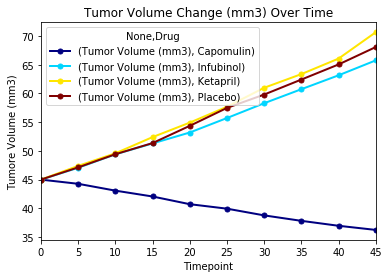

In [53]:
#plot the following drugs: Capomulin, Infubinol, Ketapril, and Placebo
ax =drug_plot.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Tumor Volume Change (mm3) Over Time')
ax.set(ylabel='Tumore Volume (mm3)')
plt.show()

# Creating a scatter plot that shows how the number of metastatic sites changes over time for each treatment.

In [60]:
#show the number of metastic sites groupd by drug name
#plot the following drugs: Capomulin, Infubinol, Ketapril, and Placebo
meta_df= pd.DataFrame(pyma_df)
meta1_df = meta_df.loc[ :, ["Drug", "Metastatic Sites", "Timepoint"]]
meta2_df = meta1_df.groupby(["Drug", "Timepoint"])
meta3_df = round(meta2_df.mean(),2)
meta4_df = meta3_df.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"], : ]
meta_plot=meta4_df.unstack(level=0)
meta_plot.head(50)

Metastatic Sites                           
Drug             Capomulin Infubinol Ketapril Placebo
Timepoint                                            
0                     0.00      0.00     0.00    0.00
5                     0.16      0.28     0.30    0.38
10                    0.32      0.67     0.59    0.83
15                    0.38      0.90     0.84    1.25
20                    0.65      1.05     1.21    1.53
25                    0.82      1.28     1.63    1.94
30                    1.09      1.59     2.06    2.27
35                    1.18      1.67     2.29    2.64
40                    1.38      2.10     2.73    3.17
45                    1.48      2.11     3.36    3.27

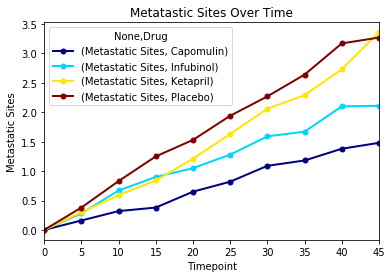

In [70]:
meta_ax =meta_plot.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Metatastic Sites Over Time')
meta_ax.set(ylabel='Metastatic Sites')
plt.show()

# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate) 

In [66]:
mice_df= pd.DataFrame(pyma_df)
mice1_df = mice_df.loc[ :, ["Drug", "Mouse ID", "Timepoint"]]
mice2_df = mice1_df.groupby(["Drug", "Timepoint"])
mice3_df = mice2_df.count()
mice4_df = mice3_df.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"], : ]
mice_plot=mice4_df.unstack(level=0)
mice_plot.head(50)

Mouse ID                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0              25.0      25.0     25.0    25.0
5              25.0      25.0     23.0    24.0
10             25.0      21.0     22.0    24.0
15             24.0      21.0     19.0    20.0
20             23.0      20.0     19.0    19.0
25             22.0      18.0     19.0    17.0
30             22.0      17.0     18.0    15.0
35             22.0      12.0     17.0    14.0
40             21.0      10.0     15.0    12.0
45             21.0       9.0     11.0    11.0

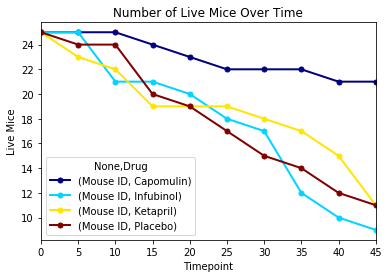

In [71]:
mice_ax =mice_plot.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Number of Live Mice Over Time')
mice_ax.set(ylabel='Live Mice')
plt.show()

# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.